In [1]:
# Depencies
import pandas as pd

In [2]:
# Read reds_df from csv file
reds_df = pd.read_csv('../data/reds_df.csv')
reds_df


,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,medium
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,medium
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,medium
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,medium
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,medium
1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,medium
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,medium


In [3]:
# Drop imported index
reds_df = reds_df.drop(['Unnamed: 0'], axis= 1)

In [4]:
reds_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,medium


In [5]:
reds_df['quality_category'].value_counts()

medium    1571
high        18
low         10
Name: quality_category, dtype: int64

In [6]:
# Install PyCaret
!pip install pycaret

In [7]:
#Check the shape of the data for white wines
print(f'Shape of the red wine data: {reds_df.shape}')

Shape of the red wine data: (1599, 12)


In [8]:
# Split data to create models and tunning
data_red = reds_df.sample(frac=0.95, random_state=786)
data_red_unseen = reds_df.drop(data_red.index)
data_red.reset_index(inplace= True, drop= True)
data_red_unseen.reset_index(inplace= True, drop= True)

print('Data for Modeling (reds): ' + str(data_red.shape))
print('----------------------------------------------------')
print('Unseen Data For Predictions (reds): ' + str(data_red_unseen.shape))

Data for Modeling (reds): (1519, 12)
----------------------------------------------------
Unseen Data For Predictions (reds): (80, 12)


In [9]:
# Import pycaret classification
from pycaret.classification import *

In [10]:
# Set up environment and create the transformation pipeline to prepare the data for modeling and deployment.
# Data Type Inference:  Any experiment performed in PyCaret begins with determining the correct data types for all features. The setup function performs essential inferences about the data and performs several downstream tasks such as ignoring ID and Date columns, categorical encoding, missing values imputation based on the data type inferred by PyCaret’s internal algorithm. Once the setup is executed a dialogue box (see example below) appears with the list of all the features and their inferred data types. Data type inferences are usually correct but once the dialogue box appears, user should review the list for accuracy. If all the data types are inferred correctly you may press enter to continue or if not you may type ‘quit‘ to stop the experiment.
print('Data set up for red wines')
exp_clf101 = setup(data = data_red, target = 'quality_category', session_id= 123, data_split_stratify= True)

,Description,Value
0,session_id,123
1,Target,quality_category
2,Target Type,Multiclass
3,Label Encoded,"high: 0, low: 1, medium: 2"
4,Original Data,"(1519, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
# Comparison of models --- whites
best_models_reds = compare_models(fold = 6)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9831,0.7484,0.3333,0.9664,0.9747,0.0000,0.0000,0.9833
knn,K Neighbors Classifier,0.9831,0.5223,0.3333,0.9664,0.9747,0.0000,0.0000,0.6800
ridge,Ridge Classifier,0.9831,0.0000,0.3333,0.9664,0.9747,0.0000,0.0000,0.0067
rf,Random Forest Classifier,0.9831,0.7080,0.3333,0.9664,0.9747,0.0000,0.0000,0.0717
qda,Quadratic Discriminant Analysis,0.9831,0.5000,0.3333,0.9664,0.9747,0.0000,0.0000,0.0050
et,Extra Trees Classifier,0.9821,0.7073,0.3330,0.9664,0.9742,-0.0012,-0.0014,0.0650
lightgbm,Light Gradient Boosting Machine,0.9803,0.7498,0.3324,0.9664,0.9733,-0.0031,-0.0033,0.1900
gbc,Gradient Boosting Classifier,0.9737,0.6971,0.3301,0.9663,0.9699,-0.0077,-0.0078,0.1633
lda,Linear Discriminant Analysis,0.9680,0.8013,0.3835,0.9680,0.9680,0.0440,0.0436,0.0083
ada,Ada Boost Classifier,0.9661,0.4713,0.3276,0.9661,0.9661,-0.0113,-0.0125,0.0350


In [17]:
# Print the best model = Random Forest Classifier (based on accuracy) --- reds
print(best_models_reds)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [18]:
# List of the models
# These models had the same Accuracy and were the top: lr, knn, ridge, rf, qda
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [19]:
# Creating the best model (logistic regression)
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
lr_reds = create_model('lr', fold = 6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9831,0.7389,0.3333,0.9666,0.9748,0.0000,0.0000
1,0.9831,0.8539,0.3333,0.9664,0.9746,0.0000,0.0000
2,0.9831,0.7694,0.3333,0.9664,0.9746,0.0000,0.0000
3,0.9831,0.4321,0.3333,0.9664,0.9746,0.0000,0.0000
4,0.9831,0.8669,0.3333,0.9664,0.9746,0.0000,0.0000
5,0.9831,0.8293,0.3333,0.9664,0.9746,0.0000,0.0000
Mean,0.9831,0.7484,0.3333,0.9664,0.9747,0.0000,0.0000
SD,0.0000,0.1485,0.0000,0.0001,0.0001,0.0000,0.0000


In [24]:
# Creating the best model (extra trees classifier)
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
et_reds = create_model('et', fold = 6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9831,0.8245,0.3333,0.9666,0.9748,0.0000,0.0000
1,0.9831,0.8317,0.3333,0.9664,0.9746,0.0000,0.0000
2,0.9831,0.6916,0.3333,0.9664,0.9746,0.0000,0.0000
3,0.9774,0.5467,0.3314,0.9663,0.9718,-0.0071,-0.0082
4,0.9831,0.6754,0.3333,0.9664,0.9746,0.0000,0.0000
5,0.9831,0.6736,0.3333,0.9664,0.9746,0.0000,0.0000
Mean,0.9821,0.7073,0.3330,0.9664,0.9742,-0.0012,-0.0014
SD,0.0021,0.0978,0.0007,0.0001,0.0011,0.0027,0.0031


In [22]:
# Creating the best model (Light Gradient Boosting Machine)
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
lightgbm_reds = create_model('lightgbm', fold = 6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9719,0.8522,0.3295,0.9664,0.9691,-0.0114,-0.0116
1,0.9831,0.8512,0.3333,0.9664,0.9746,0.0000,0.0000
2,0.9831,0.8155,0.3333,0.9664,0.9746,0.0000,0.0000
3,0.9831,0.5895,0.3333,0.9664,0.9746,0.0000,0.0000
4,0.9774,0.7543,0.3314,0.9663,0.9718,-0.0071,-0.0082
5,0.9831,0.6360,0.3333,0.9664,0.9746,0.0000,0.0000
Mean,0.9803,0.7498,0.3324,0.9664,0.9733,-0.0031,-0.0033
SD,0.0043,0.1031,0.0015,0.0000,0.0021,0.0045,0.0048


In [25]:
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
print('lr for reds model')
print(lr_reds)
print('----------------------------------------------')
print('et for reds model')
print(et_reds)
print('----------------------------------------------')
print('lightgbm for reds model')
print(lightgbm_reds)
print('----------------------------------------------')

lr for reds model
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
----------------------------------------------
et for reds model
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
----------------------------------------------
lightgbm for re

In [26]:
# Tune models for --- reds
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
tuned_lr_reds = tune_model(lr_reds, fold = 6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9831,0.7470,0.3333,0.9666,0.9748,0.0000,0.0000
1,0.9831,0.9031,0.3333,0.9664,0.9746,0.0000,0.0000
2,0.9831,0.7397,0.3333,0.9664,0.9746,0.0000,0.0000
3,0.9831,0.4071,0.3333,0.9664,0.9746,0.0000,0.0000
4,0.9831,0.9180,0.3333,0.9664,0.9746,0.0000,0.0000
5,0.9831,0.8368,0.3333,0.9664,0.9746,0.0000,0.0000
Mean,0.9831,0.7586,0.3333,0.9664,0.9747,0.0000,0.0000
SD,0.0000,0.1715,0.0000,0.0001,0.0001,0.0000,0.0000


In [27]:
# Tune models for --- reds
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
tuned_et_reds = tune_model(et_reds, fold = 6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9831,0.5000,0.3333,0.9666,0.9748,0.0000,0.0000
1,0.9831,0.5000,0.3333,0.9664,0.9746,0.0000,0.0000
2,0.9831,0.5000,0.3333,0.9664,0.9746,0.0000,0.0000
3,0.9831,0.5000,0.3333,0.9664,0.9746,0.0000,0.0000
4,0.9831,0.5000,0.3333,0.9664,0.9746,0.0000,0.0000
5,0.9831,0.5000,0.3333,0.9664,0.9746,0.0000,0.0000
Mean,0.9831,0.5000,0.3333,0.9664,0.9747,0.0000,0.0000
SD,0.0000,0.0000,0.0000,0.0001,0.0001,0.0000,0.0000


In [28]:
# Tune models for --- reds
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
tuned_lightgbm_reds = tune_model(lightgbm_reds, fold = 6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9831,0.5987,0.3333,0.9666,0.9748,0.0000,0.0000
1,0.9831,0.6844,0.3333,0.9664,0.9746,0.0000,0.0000
2,0.9831,0.6702,0.3333,0.9664,0.9746,0.0000,0.0000
3,0.9831,0.2758,0.3333,0.9664,0.9746,0.0000,0.0000
4,0.9831,0.7260,0.3333,0.9664,0.9746,0.0000,0.0000
5,0.9831,0.7332,0.3333,0.9664,0.9746,0.0000,0.0000
Mean,0.9831,0.6147,0.3333,0.9664,0.9747,0.0000,0.0000
SD,0.0000,0.1579,0.0000,0.0001,0.0001,0.0000,0.0000


In [29]:
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
print('tuned lr for reds model')
print(tuned_lr_reds)
print('----------------------------------------------')
print('tuned et for reds model')
print(tuned_et_reds)
print('----------------------------------------------')
print('tuned lightgbm for reds model')
print(tuned_lightgbm_reds)
print('----------------------------------------------')

tuned lr for reds model
LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
----------------------------------------------
tuned et for reds model
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='gini', max_depth=3, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.1, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
----------------------------------------------
tuned lig

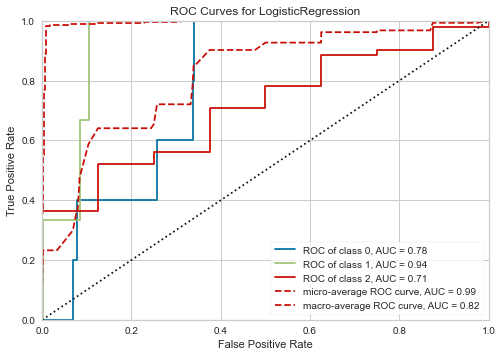

In [30]:
# plot models for accuracy
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lr_reds, plot = 'auc')

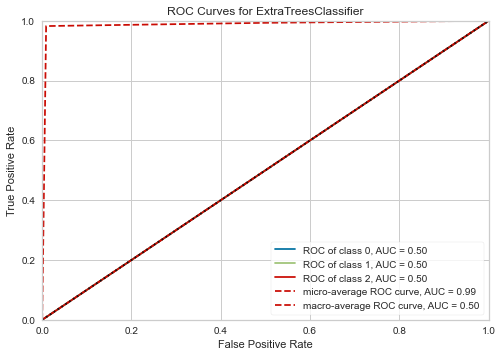

In [31]:
# plot models for accuracy
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_et_reds, plot = 'auc')

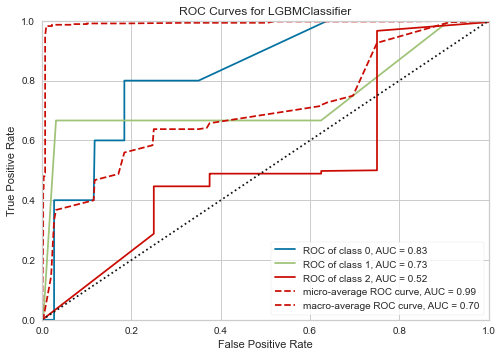

In [32]:
# plot models for accuracy
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lightgbm_reds, plot = 'auc')

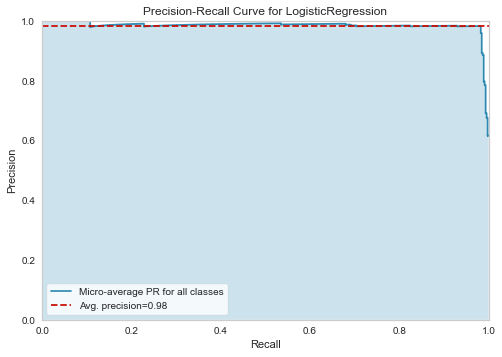

In [33]:
# plot models for precision-recall
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lr_reds, plot = 'pr')

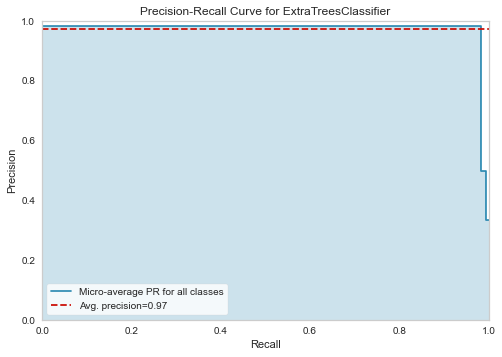

In [34]:
# plot models for precision-recall
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_et_reds, plot = 'pr')

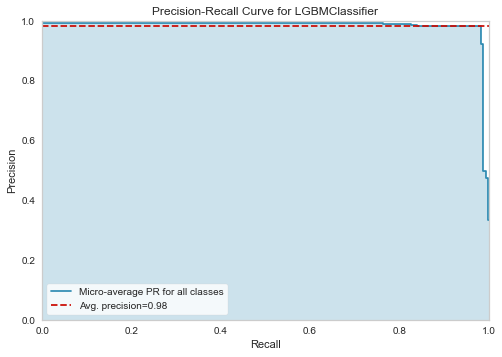

In [35]:
# plot models for precision-recall
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lightgbm_reds, plot = 'pr')

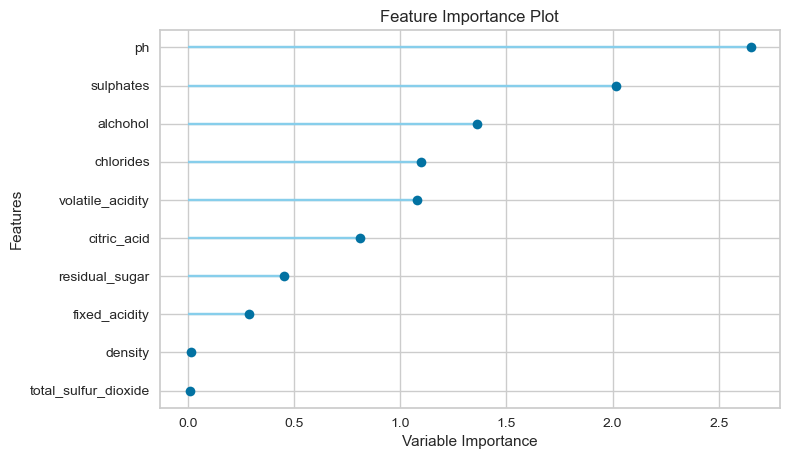

In [36]:
# plot models for feature importance
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lr_reds, plot = 'feature')

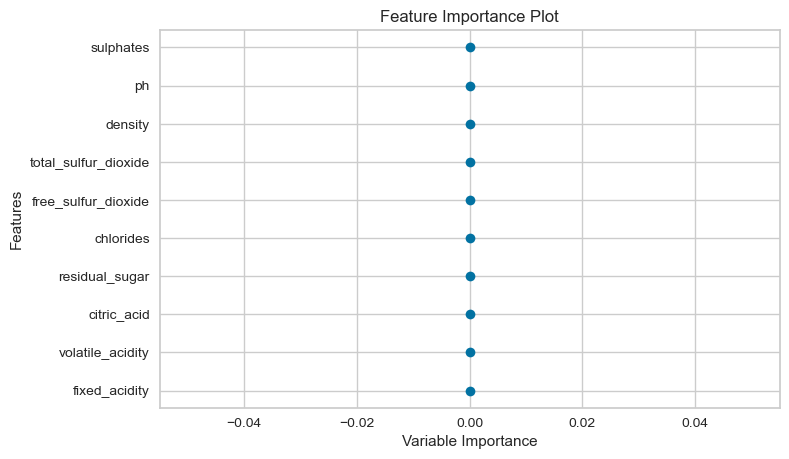

In [37]:
# plot models for feature importance
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_et_reds, plot = 'feature')

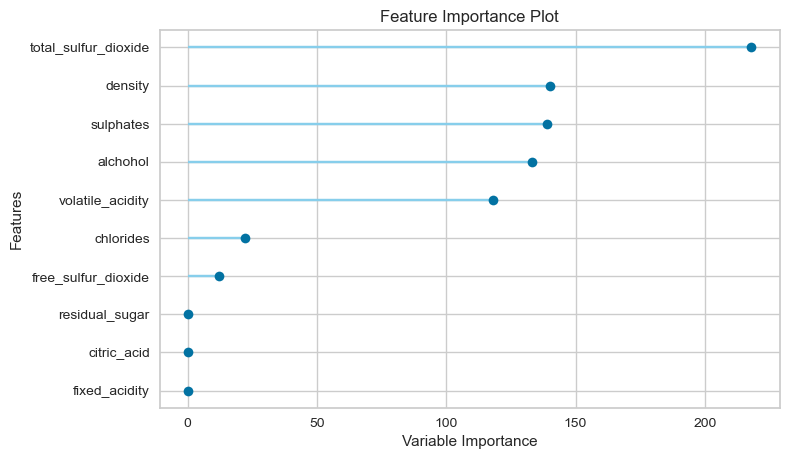

In [38]:
# plot models for feature importance
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lightgbm_reds, plot = 'feature')

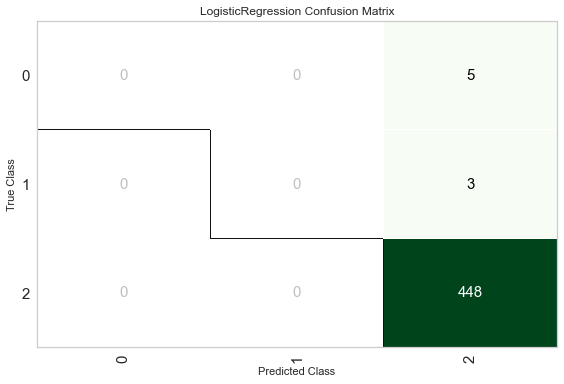

In [39]:
# plot models for confusion matrix
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lr_reds, plot = 'confusion_matrix')

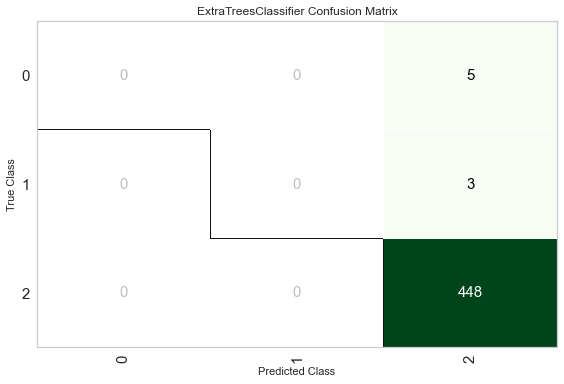

In [40]:
# plot models for confusion matrix
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_et_reds, plot = 'confusion_matrix')

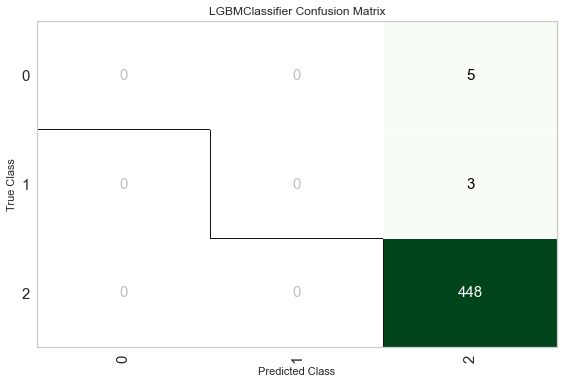

In [41]:
# plot models for confusion matrix
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lightgbm_reds, plot = 'confusion_matrix')

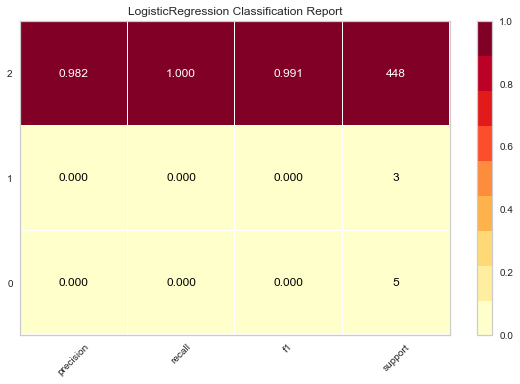

In [42]:
# plot models for classification report
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lr_reds, plot = 'class_report')

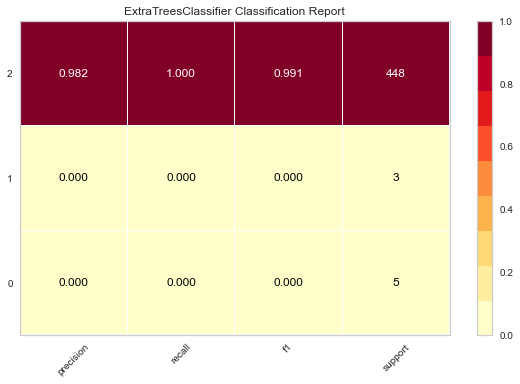

In [43]:
# plot models for classification report
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_et_reds, plot = 'class_report')

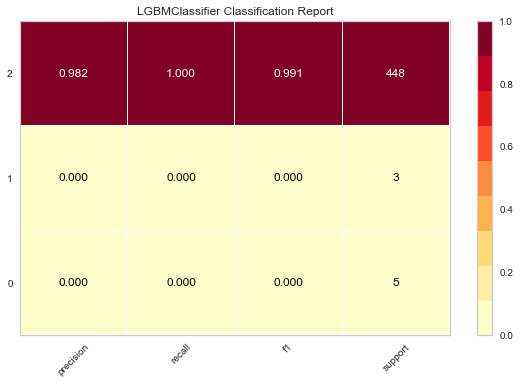

In [44]:
# plot models for classification report
# Choosing the following as top 3 to evaluate
# Top 3: lr, et, lightgbm --- reds
plot_model(tuned_lightgbm_reds, plot = 'class_report')

In [45]:
# Only tunnning the top model, lr, since the top three models are so close will only focus on the top model.
# Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.
evaluate_model(tuned_lr_reds)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [46]:
#  Predict model, add probablylity of each category
predict_model(tuned_lr_reds, raw_score= True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9825,0,0.3333,0.9652,0.9738,0.0000,0.0000


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category,Label,Score_high,Score_low,Score_medium
0,6.4,0.570,0.14,3.9,0.070,27.0,73.0,0.99669,3.32,0.48,9.2,medium,medium,0.0001,0.0004,0.9996
1,9.3,0.480,0.29,2.1,0.127,6.0,16.0,0.99680,3.22,0.72,11.2,medium,medium,0.0118,0.0016,0.9867
2,10.9,0.320,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,medium,medium,0.0147,0.0003,0.9850
3,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,medium,medium,0.0004,0.0000,0.9996
4,5.3,0.715,0.19,1.5,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,medium,medium,0.0051,0.0002,0.9947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,6.0,0.510,0.00,2.1,0.064,40.0,54.0,0.99500,3.54,0.93,10.7,medium,medium,0.0061,0.0004,0.9935
452,7.5,0.520,0.42,2.3,0.087,8.0,38.0,0.99720,3.58,0.61,10.5,medium,medium,0.0015,0.0014,0.9971
453,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,medium,medium,0.0063,0.0011,0.9925
454,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6,medium,medium,0.0096,0.0001,0.9903


In [47]:
# Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production
final_reds_qda = finalize_model(tuned_lr_reds)

ValueError: pos_label=1 is not a valid label: array([0, 2], dtype=int64)

In [48]:
#  ###### Unable to finalize out models due to the structure of the data set for red wines #######